# MWS Secondary Target Selection

## MWS_CALIB_GALAH

Maintainers:
  - Ting Li (selection/catalog)
  - Andrew Cooper (secondary target code)

In [2]:
ls ../raw

galah_xm_gaia_4DESI_v0.fits


{ DESCRIPTION NEEDED }

The selection criteria are:

???

In [3]:
pwd

'/global/projecta/projectdirs/desi/external/mws/sv/MWS_CALIB_GALAH/1/code'

In [4]:
import os
import numpy as np
from astropy.table import Table, Column
import astropy.io.fits as fits

In [6]:
target_class   = 'MWS_CALIB_GALAH'
input_filename = 'galah_xm_gaia_4DESI_v0.fits'

REF_CAT   = 'G'
REF_EPOCH = '2015.5'

In [7]:
# Relative paths
input_path  = os.path.join('..','raw',input_filename)

# Separate bright and faint output
output_path = os.path.join('..','indata','{}.fits'.format(target_class))

output_dir  = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    print('Making output directory: {}'.format(os.path.abspath(output_dir)))
    os.makedirs(dir)

In [8]:
print('Reading input: {}'.format(os.path.abspath(input_path)))
d = Table.read(input_path)
print('Read {:d} rows'.format(len(d)))

Reading input: /global/projecta/projectdirs/desi/external/mws/sv/MWS_CALIB_GALAH/1/raw/galah_xm_gaia_4DESI_v0.fits
Read 339064 rows


In [9]:
print('First 3 rows:')
print(d[0:3])
print(d.colnames)

First 3 rows:
        fe_h        phot_g_mean_mag ...      source_id        ebv   
------------------- --------------- ... ------------------- --------
 0.0877856296106319         12.7933 ... 6780180582017233280 0.089525
 -0.117206793266491         13.0403 ... 6780180341499057920 0.091186
-0.0519457608846025         12.2593 ... 6777178258141944832 0.089088
['fe_h', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'pmra', 'pmdec', 'ra', 'dec', 'source_id', 'ebv']


In [12]:
BRIGHT_TIME_BRIGHT_LIMIT = 16.0

finite_mag                 = np.isfinite(d['phot_g_mean_mag'])
brighter_than_bright_limit = (d['phot_g_mean_mag'] < BRIGHT_TIME_BRIGHT_LIMIT) & finite_mag
fainter_than_bright_limit  = (d['phot_g_mean_mag'] > BRIGHT_TIME_BRIGHT_LIMIT) & finite_mag

print('Undefined mags: {}'.format((~finite_mag).sum()))
print('Mag range: {:5.2f} < G < {:5.2f}'.format(d['phot_g_mean_mag'][finite_mag].min() ,d['phot_g_mean_mag'][finite_mag].max()))
print('Targets brighter than G = 16: {}/{} ({:3.2%})'.format(brighter_than_bright_limit.sum(),
                                                             len(d),
                                                             brighter_than_bright_limit.sum()/len(d)))

bright_time_targets = fainter_than_bright_limit

Undefined mags: 0
Mag range:  7.89 < G < 20.55
Targets brighter than G = 16: 338294/339064 (99.77%)


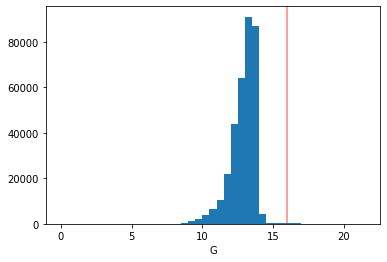

In [19]:
import matplotlib.pyplot as pl
pl.hist(d['phot_g_mean_mag'][finite_mag],bins=np.arange(0,22,0.5));
pl.xlabel('G');
pl.axvline(BRIGHT_TIME_BRIGHT_LIMIT,c='r',alpha=0.5);

Adjust to secondary target data model:

In [20]:
output = d['ra','dec','source_id'][bright_time_targets]
output.rename_columns(['ra','dec','source_id'],['RA','DEC','REF_ID'])
output.add_column(Column(np.repeat(False,len(output)),'OVERRIDE'))
output.add_column(Column(np.zeros(len(output),dtype=np.float32),'PMRA'))
output.add_column(Column(np.zeros(len(output),dtype=np.float32),'PMDEC'))
output.add_column(Column(np.repeat(REF_CAT,len(output)),'REF_CAT'))
output.add_column(Column(np.repeat(REF_EPOCH,len(output)),'REF_EPOCH'))

Add header:

In [21]:
output.meta['VRAWDATA'] = int(os.path.abspath(input_path).split(os.path.sep)[-3])

In [22]:
output[0:3]

RA,DEC,REF_ID,OVERRIDE,PMRA,PMDEC,REF_CAT,REF_EPOCH
float64,float64,int64,bool,float32,float32,str1,str6
315.682804009912,-34.9603633275868,6780216109985303424,False,0.0,0.0,G,2015.5
320.332189016332,-11.874132382335,6891839148911734656,False,0.0,0.0,G,2015.5
328.107865433629,-15.9852349426019,6839021359092302720,False,0.0,0.0,G,2015.5


Write output:

In [23]:
print('Writing {:d} rows of output to {}'.format(len(output),os.path.abspath(output_path)))
output.write(output_path,overwrite=True)

Writing 770 rows of output to /global/projecta/projectdirs/desi/external/mws/sv/MWS_CALIB_GALAH/1/indata/MWS_CALIB_GALAH.fits
